In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
#Use data from train.csv for training and testing datasets
#test.csv doesn't contain ground-truth labels so we wouldn't be able to determine testing accuracy from it
dataset = pd.read_csv('train.csv')
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

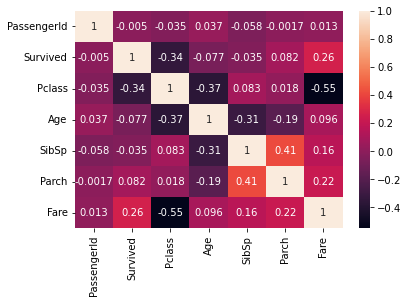

In [7]:
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:>

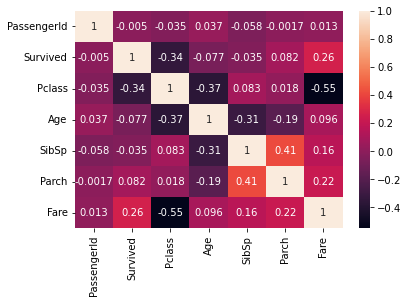

In [8]:
sns.heatmap(dataset.corr(),annot=True)

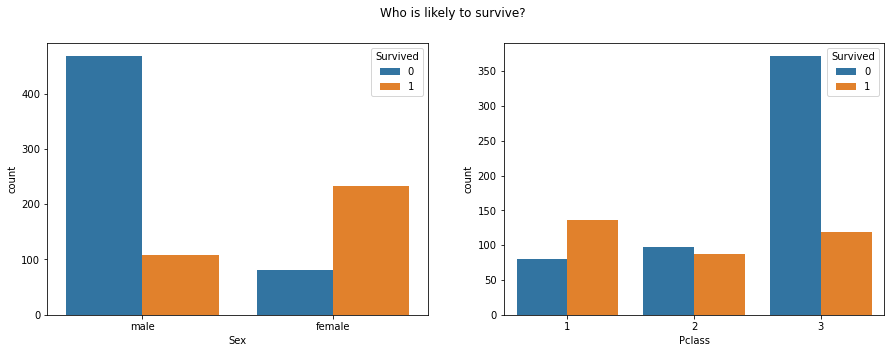

In [9]:
f,ax = plt.subplots(1,2,figsize=(15,5))
f.suptitle('Who is likely to survive?')
sns.countplot(x='Sex',hue='Survived',data=dataset,ax=ax[0])
sns.countplot(x='Pclass',hue='Survived',data=dataset,ax=ax[1])
plt.show()

- The first plot shows that the female is more likely to survive than male.
- The second plot shows that individuals in the first class are more likely to survive than other classes.

## Filling in missing values

### Cabin

The deck was determined by the letter in the cabin. We will group the cabins based on the deck they are on. For all the missing values, we will fill in U for unknown.

In [10]:
print('number of unique cabins: '+str(dataset['Cabin'].nunique())+ ' and number of missing cabins: '+ str(dataset['Cabin'].isnull().sum()))

number of unique cabins: 147 and number of missing cabins: 687


In [11]:
dataset['deck'] = dataset['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

Text(0.5, 1.0, 'Survival rates by deck')

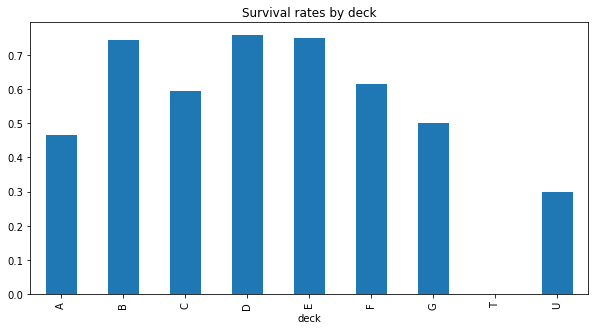

In [12]:
# then let's check our assumptions about the survival by deck
dataset[['deck', 'Survived']].groupby('deck')['Survived'].mean().plot(kind='bar',figsize=(10,5))
plt.title('Survival rates by deck')


In [13]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


### Age

- We are to check how age affects the survival rate.
- Based on the heatmap, there is a correlation between age and Pclass.
- We can also check if age makes a difference based on gender. 


<AxesSubplot:xlabel='Age', ylabel='Density'>

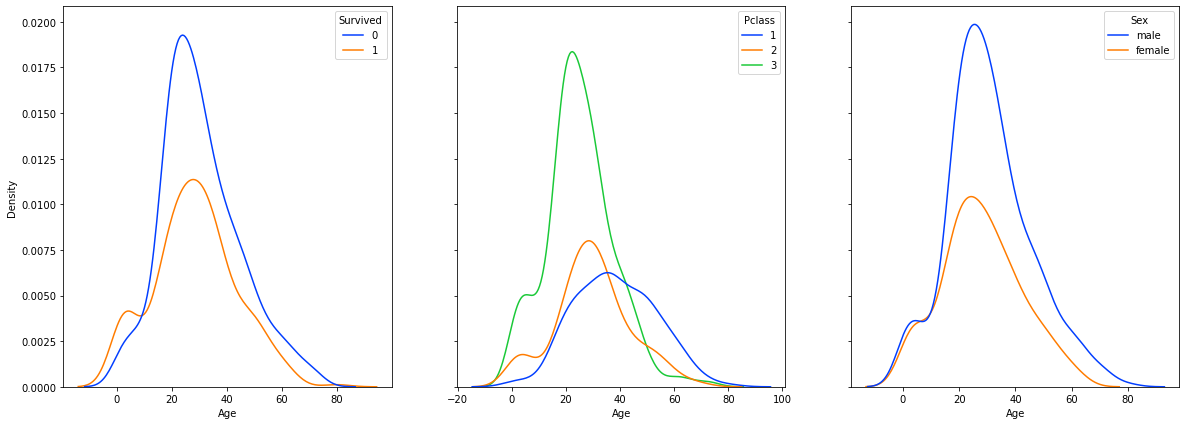

In [14]:
f,ax= plt.subplots(1,3,figsize=(20,7),sharey=True)
sns.kdeplot(x='Age',data=dataset,hue='Survived',palette='bright',ax=ax[0])
sns.kdeplot(x='Age',data=dataset,hue='Pclass',palette='bright',ax=ax[1])
sns.kdeplot(x='Age',data=dataset,hue='Sex',palette='bright' ,ax=ax[2])



- The first plot shows that people between the ages 20 and 40 survived more than the rest.
- The second plot shows that people in the first class are slightly older than the other classes.
- The third plot shows that there are differences in age based on sex. We can say age is correlated to sex.

With this said, we cannot use the overall mean/median to fill in all the missing values. We will take into account the sex and class of each individual, so using the mean/median per category might be better approach.

In [15]:
print('number of missing ages: '+str(dataset['Age'].isnull().sum()))

number of missing ages: 177


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

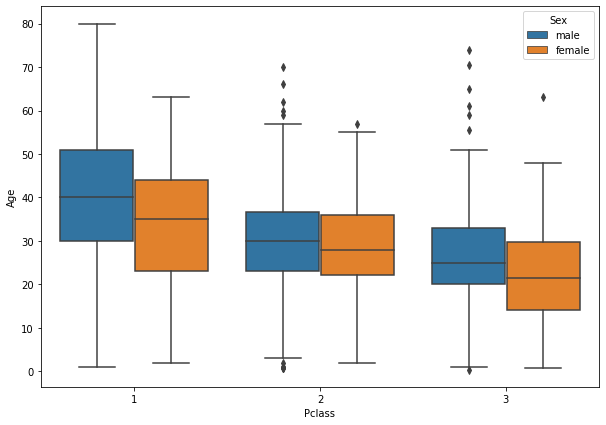

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=dataset)

In [17]:
#There is an age difference between the ages of difreent classes and sex within the dataset
dataset['Age'] = dataset.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

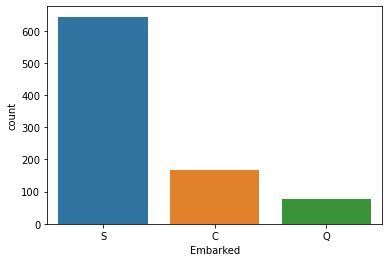

In [18]:
sns.countplot(x='Embarked',data=dataset)

In [19]:
print('The number of missing values for Embarked port: '+str(dataset['Embarked'].isnull().sum()))
dataset[dataset['Embarked'].isnull()]



The number of missing values for Embarked port: 2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


The most common port is S (SouthHamptons). So we will use this port to fill in the missing ports.

In [20]:
dataset['Embarked']=dataset['Embarked'].fillna(value='S')

### Fare

We will fill in the missing fare value based on the class and port embarked.

In [21]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck


In [22]:
x = dataset[(dataset['Pclass']=='3')& (dataset['Embarked']=='S')]['Fare'].median()
dataset['Fare']= dataset['Fare'].fillna(x)

## Feature Engineering

### Name

We can extract the title from the name feature and form categories based on the titles.

In [23]:
dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


<AxesSubplot:xlabel='Title', ylabel='count'>

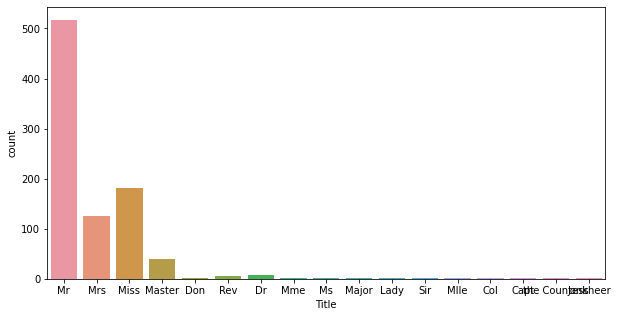

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=dataset)



In [25]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,U,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr


Some titles have few values, so we have grouped them as Other.

In [26]:
dataset['Title'] = np.where(dataset['Title'].isin(['Mr', 'Mrs', 'Master', 'Miss']), dataset['Title'], 'Other')

In [27]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S,U,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

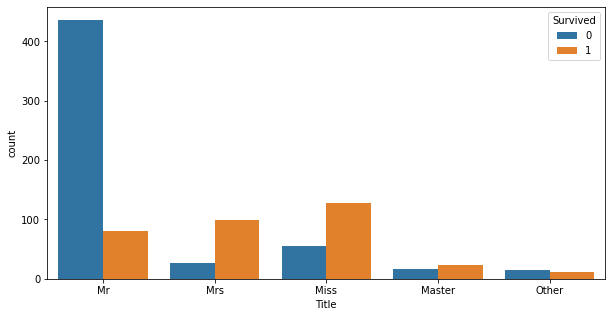

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title',data=dataset,hue='Survived')



### Ticket

Some tickects contain letters and numerical values.The plan is to remove all the letters form the string, then group the tickets based on the first leading digit.


In [29]:
#check if there a letters or not
def prefix(ticket):
    
    check = ticket.split(' ')[0][0]
    if check.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'No prefix'

def ticket_features(df):
    
    df['Ticket'] = df['Ticket'].replace('LINE','LINE 0')
    df['Ticket'] = df['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
    df['Prefix'] = df['Ticket'].apply(lambda x: prefix(x))
    df['TNumeric'] = df['Ticket'].apply(lambda x: int(x.split(' ')[-1]))
    df['TNlen'] = df['TNumeric'].apply(lambda x : len(str(x)))
    df['Ticket_LeadingDigit'] = df['TNumeric'].apply(lambda x : int(str(x)[0]))
    df['TGroup'] = df['TNumeric'].apply(lambda x: str(x//10))

    df = df.drop(columns=['Ticket','TNumeric','Prefix','TNlen','TGroup'])

    return df

dataset = ticket_features(dataset)
dataset.head(1)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,deck,Title,Ticket_LeadingDigit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S,U,Mr,2


In [30]:
dataset['deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
#Datatypes after preprocessing
dataset.dtypes

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Cabin                   object
Embarked                object
deck                    object
Title                   object
Ticket_LeadingDigit      int64
dtype: object

### Encoding Categorical features

In [32]:
# encoding sex column
dataset.replace({'Sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'embarked' column
dataset.replace({'Embarked':{'C':0,'S':1, 'Q':2}}, inplace=True)

#encoding title column
dataset.replace({'Title':{'Mr':0,'Mrs':1, 'Master':2, 'Miss':3, 'Other':5}}, inplace=True)

deck = pd.get_dummies(dataset['deck'],prefix='Cabin')
dataset = dataset.drop(columns= ['Cabin', 'Name', 'deck'], axis=1)
dataset= pd.concat([dataset,deck],axis=1)


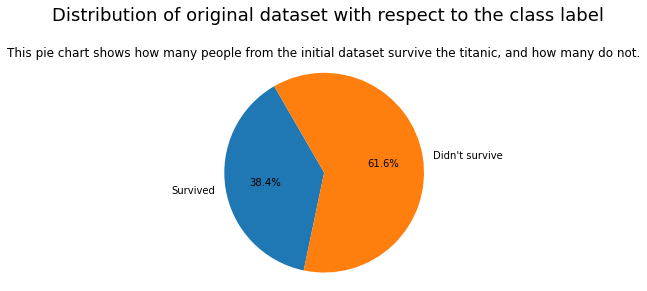

In [33]:
num_survived = sum(dataset['Survived'] == 1)
num_not_survived = sum(dataset['Survived'] == 0)

labels = ["Survived", "Didn't survive"]
sizes = [num_survived, num_not_survived]

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  startangle=120)
plt.axis('equal')
plt.suptitle("Distribution of original dataset with respect to the class label", y=1, fontsize=18)
plt.title("This pie chart shows how many people from the initial dataset survive the titanic, and how many do not.")
plt.tight_layout()
plt.show()

In [34]:
#Need to minimise False Negatives

The results above show that we are interested in minimising our false negatives. 

### Splitting the data

#### Splitting into testing and training set

In [35]:
#Update
#I had to split the training file because the test file doesn't have any ground-truth labels so we can't find testing accuracy from it
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

#### Splitting into input features and class label

In [36]:
y_train = train['Survived']
x_train = train.drop(['Survived', 'PassengerId'], axis=1)

y_test = test['Survived']
x_test = test.drop(['Survived', 'PassengerId'], axis=1)

In [37]:
#Print Input Features (Column Names)
train_columns = ""
for i in range(0, len(x_train.columns)):
    train_columns += x_train.columns[i]
    if i != len(x_train.columns)-1:
        train_columns += ", "

print(f"Input Features:\n{train_columns}\n")

#Print Output Feature (Column Name)
#There's only one output feature
print(f"Output Feature: Survived")

Input Features:
Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title, Ticket_LeadingDigit, Cabin_A, Cabin_B, Cabin_C, Cabin_D, Cabin_E, Cabin_F, Cabin_G, Cabin_T, Cabin_U

Output Feature: Survived


Convert Dataframe to Matrix

In [38]:
#Training Set
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

#x_train = np.insert(x_train, 0, 1, axis=1) #insert a first column of 1's as x0 
#print(x_train)

In [39]:
#Testing Set
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

#x_test = np.insert(x_test, 0, 1, axis=1) #insert a first column of 1's as x0 
#print(x_test)

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

logreg = LogisticRegression(tol=0.005, C=1, max_iter= 1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
#print(getAccuracy(y_test, y_pred))

print("Logistic Regression Metrics:\n")
print(f"Training Accuracy: {logreg.score(x_train,y_train)}")
print(f"Testing Accuracy: {logreg.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, logreg.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, logreg.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, logreg.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, logreg.predict(x_test))}")

Logistic Regression Metrics:

Training Accuracy: 0.8117977528089888
Testing Accuracy: 0.8547486033519553
Precision: 0.8518518518518519
Recall: 0.71875
F1 Score: 0.7796610169491525
Matthew's Correlation Coefficient: 0.6778839506608835


Confusion Matrix


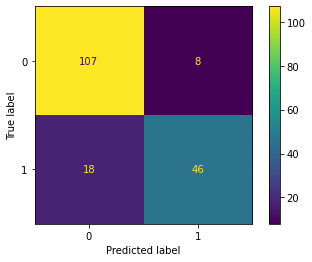

In [44]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from IPython.display import display

c_matrix = confusion_matrix(y_test, logreg.predict(x_test))

# print("Confusion Matrix:")
# print(c_matrix)
# print()

# TP = c_matrix[0][0]
# FP = c_matrix[0][1]
# FN = c_matrix[1][0]
# TN = c_matrix[1][1]

# print(f"True Positives: {TP}, False Positives: {FP}")
# print(f"True Negatives: {TN}, False Negatives: {FN}")
# print()

# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")





print("Confusion Matrix")
plot_confusion_matrix(logreg, x_test, y_test) 



In [45]:
# #Pick 10 learning rates
# learning_rates = [0.0000005 * i for i in range(10)]

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each learning rate
# for i in range(0,len(learning_rates)):
#     print(f"Learning Rate: {learning_rates[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(0.5, learning_rates[i],0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)
    
#     logreg = LogisticRegression(tol=0.005, C=1, max_iter= 1000)
#     logreg.fit(x_train, y_train)
#     y_pred = logreg.predict(x_test)

## Stochastic Gradient Descent (Logistic Regression with Gradient Descent)

In [46]:
B = np.random.normal(size = x_train.shape[1])

In [47]:
B

array([ 2.04187066, -0.28011943, -0.07768165, -0.05492647,  0.29935223,
        0.1439015 ,  1.45396695, -1.42750139, -1.74716303,  0.67012458,
        0.83335035, -0.10865887,  1.46745904, -0.4529487 ,  1.87689958,
        1.58243793, -0.50859645,  0.85480236])

In [48]:
from sklearn.linear_model import SGDClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

# I'm pretty sure the StandardScaler is for feature scaling
#See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))


stochGD = SGDClassifier(max_iter=1000, tol=1e-3)
second = stochGD.fit(x_train, y_train,coef_init=B) #coef_init not working
print("Stochastic Gradient Descent Metrics:\n")
print(f"Training Accuracy: {stochGD.score(x_train,y_train)}")
print(f"Testing Accuracy: {stochGD.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, stochGD.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, stochGD.predict(x_test))}")


Stochastic Gradient Descent Metrics:

Training Accuracy: 0.7303370786516854
Testing Accuracy: 0.7597765363128491
Precision: 0.6105263157894737
Recall: 0.90625
F1 Score: 0.7295597484276729
Matthew's Correlation Coefficient: 0.5613452514603097


Confusion Matrix


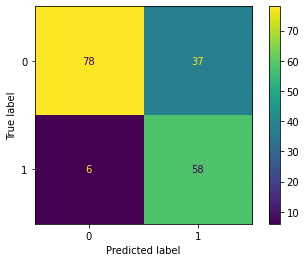

In [49]:
print("Confusion Matrix")
plot_confusion_matrix(stochGD, x_test, y_test) 

## Decision Trees

In [50]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(x_train, y_train)
#tree.plot_tree(dec_tree)
print("Decision Trees Metrics:\n")
print(f"Training Accuracy: {dec_tree.score(x_train,y_train)}")
print(f"Testing Accuracy: {dec_tree.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, dec_tree.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, dec_tree.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, dec_tree.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, dec_tree.predict(x_test))}")

Decision Trees Metrics:

Training Accuracy: 0.9915730337078652
Testing Accuracy: 0.8100558659217877
Precision: 0.7419354838709677
Recall: 0.71875
F1 Score: 0.7301587301587302
Matthew's Correlation Coefficient: 0.5838390889431518


Confusion Matrix


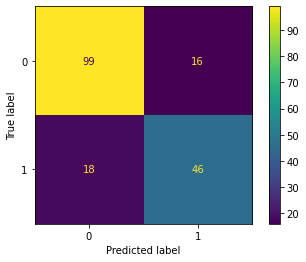

In [51]:
print("Confusion Matrix")
plot_confusion_matrix(dec_tree, x_test, y_test) 

## Perceptron

In [52]:
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(x_train, y_train)

print("Perceptron Metrics:\n")
print(f"Training Accuracy: {percep.score(x_train,y_train)}")
print(f"Testing Accuracy: {percep.score(x_test,y_test)}")
print(f"Precision: {precision_score(y_test, percep.predict(x_test),average='binary')}")
print(f"Recall: {recall_score(y_test, percep.predict(x_test),average='binary')}")
print(f"F1 Score: {f1_score(y_test, percep.predict(x_test),average='binary')}")
print(f"Matthew's Correlation Coefficient: {matthews_corrcoef(y_test, percep.predict(x_test))}")

Perceptron Metrics:

Training Accuracy: 0.75
Testing Accuracy: 0.8044692737430168
Precision: 0.7843137254901961
Recall: 0.625
F1 Score: 0.6956521739130435
Matthew's Correlation Coefficient: 0.5620694335819133


Confusion Matrix


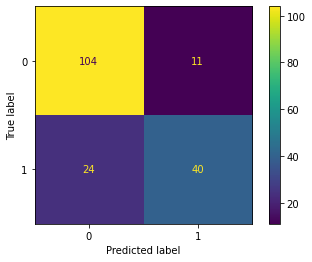

In [53]:
print("Confusion Matrix")
plot_confusion_matrix(percep, x_test, y_test) 

In [54]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve , roc_auc_score , \
# precision_recall_curve , auc
# import seaborn as sns
# % matplotlib inline
# % config InlineBackend.figure_format = ' svg '

# X , y = make_classification(n_samples = 10000, n_classes = 2, weights [ 0.95,0.05 ] , random_state = 42)
# X_train , X_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 2 )
# model = LogisticRegression( ) .fit ( X_train , y_train )

In [55]:
# from sklearn.metrics import roc_curve , roc_auc_score, precision_recall_curve , auc
# import seaborn as sns

# #ROC Curve
# fpr, tpr, thresholds = roc_curve (y_test, logreg.predict(x_test))
# sns.lineplot ([ 0 , 1 ] , [ 0 , 1 ] , linestyle = '--' )
# plt = sns.lineplot(fpr, tpr, marker = '.')
# auc_score = roc_auc_score (y_test , logreg.predict(x_test))
# print('AUC: %.3f ' % auc_score )

In [56]:
# #Precision/Recall Curve
# precision, recall, thresholds = precision_recall_curve(y_test,logreg.predict(x_test) )
# pr_auc_score = auc(recall,precision)
# sns.lineplot ([ 0 , 1 ] , [ 0 , 1 ] , linestyle = '--' )
# plt = sns.lineplot(recall, precision, marker = '.')
# print('AUC: %.3f ' % pr_auc_score )

In [75]:
print('\n\n\n\n\n\n')
print('Old Code Below')








Old Code Below


Initialise B: set of training parameters

In [58]:
B = np.random.normal(size = x_train.shape[1]) #x_train.shape[1] = number of features including x0
print(B)

[-1.0586784   1.06360817  1.08327176  1.04712642  0.46998138 -0.53468403
  0.22088351 -1.41946904 -0.4201354   0.36467689  0.91305429  0.07844986
  0.60328277  0.73239703  0.11613781 -0.25541808  0.35754528 -1.01101407]


Sigmoid function

In [59]:
def sigmoid(x):
    if x > 700:      #avoid math overflow error
        sig = 1.0

    elif x <= -700: #avoid math overflow error
        sig = 0

    else:
        sig = 1 / (1 + math.exp(-x))
        
    return sig

get H_x from function below

In [60]:
def g_z(X, B):
    Y = []
    for i in range(X.shape[0]):
        z = np.dot(X[i], B) #multiply B times X
        Y.append(sigmoid(z))
    
    return np.asarray(Y) #convert list to array

Error Function

In [61]:
def J_B(true_y, pred_y, B, regPara):
    epsilon = 1e-5 # to prevent 0 values in log

    a  = (true_y * np.log(pred_y + epsilon)) + ((1-true_y) * np.log((1 - pred_y) +epsilon))
    b = regPara * (np.sum(np.square(B[1:]))) 
    return (-1 * np.sum(a)) + b

Get Prediction Function

In [62]:
def getPredictions(H_x):
    Y = []
    for i in range(H_x.size):
        if(H_x[i] >= 0.5):
            Y.append(1)
        else:
            Y.append(0)
    return np.asarray(Y)

Get Accuracy function

In [63]:
def getAccuracy(y_true, y_pred):
    sum = 0
    for i in range(y_true.size):
        if y_true[i] == y_pred[i]:
            sum = sum + 1
            
    return np.round(sum/y_true.size,4)

Gradient Descent with regularization Function

In [64]:
 #Y(actual values),X(features), B(training parameters), reg_para(regularisation parameter), l_rate(learning rate), epsilon(stop GD when norm < epsilon)
def Grad_Desc(Y, X, B, reg_para, l_rate, epsilon):
    norm = epsilon + 1
    H_x = g_z(X, B)
    B_old = B.copy()
    while norm > epsilon:
        for i in range(B.size):
            if i == 0: # no regularization
                B[i] = B[i] - (l_rate * np.sum(H_x - Y))
            else:
                B[i] = B[i] - (l_rate * (np.sum((H_x - Y) * X[:,i]) - (reg_para * B[i] / X.shape[0])))
        norm = np.linalg.norm(np.subtract(B,B_old), 2)
        H_x = g_z(X, B)
        B_old = B.copy()
        
    return B

In [65]:
print("Original Parameters")
print(B)

h_x = g_z(x_train, B)
print("Original Error: " + str(J_B(y_train, h_x, B, regPara=0.5)) )

print("Accuracy: " + str(getAccuracy(y_train, getPredictions(h_x)) * 100) + "%")

Original Parameters
[-1.0586784   1.06360817  1.08327176  1.04712642  0.46998138 -0.53468403
  0.22088351 -1.41946904 -0.4201354   0.36467689  0.91305429  0.07844986
  0.60328277  0.73239703  0.11613781 -0.25541808  0.35754528 -1.01101407]
Original Error: 5116.785128264725
Accuracy: 33.15%


Perform Gradient Descent

In [66]:
print(np.shape(x_test))
print(np.shape(x_train))
print(x_train[0])
print(x_test[0])

(179, 18)
(712, 18)
[ 3.      1.      1.      0.      2.     15.7417  0.      3.      2.
  0.      0.      0.      0.      0.      0.      0.      0.      1.    ]
[ 2.      0.     29.      1.      0.     27.7208  0.      0.      2.
  0.      0.      0.      0.      0.      0.      0.      0.      1.    ]


In [67]:
# import time

# def Logistic_Regression(new_reg_para,new_l_rate,new_epsilon):
#     start_time = time.time()
#     B_new = Grad_Desc(y_train, x_train, B.copy(), reg_para=new_reg_para, l_rate=new_l_rate, epsilon=new_epsilon)
#     #print("New Parameters")
#     #print(B_new)

#     h_x_new = g_z(x_train, B_new)
#     print("Error after Gradient Descent: " + str(J_B(y_train, h_x_new, B_new, regPara=new_reg_para)) )
#     end_time = time.time()
    
#     y_pred = getPredictions(h_x_new)
#     training_accuracy = getAccuracy(y_train, y_pred)
#     #print(f"Learning Rate: {new_l_rate}")
#     print(f"Time taken to train model: {end_time-start_time}s")
#     print("Training Accuracy: " + str(training_accuracy*100) + " %")
    
#     #Testing Data shape not the same as Training Data
#     #Testing Accuracy
#     h_x_testing = g_z(x_test,B_new)
#     y_pred_test = getPredictions(h_x_testing)
#     testing_accuracy = getAccuracy(y_test, y_pred_test)
#     print("Testing Accuracy: " + str(testing_accuracy*100) + " %\n\n")
#     #testing_accuracy = training_accuracy # Delete this when testing data is fixed
    
#     return training_accuracy, testing_accuracy

In [68]:
# #Logistic Regression with Regression
# training_accuracy, testing_accuracy = Logistic_Regression(0.5,0.000005,0.00005)

In [69]:
# #Investigate Effect of Different Learning Rates

# #Pick 10 learning rates
# learning_rates = [0.0000005 * i for i in range(10)]

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each learning rate
# for i in range(0,len(learning_rates)):
#     print(f"Learning Rate: {learning_rates[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(0.5, learning_rates[i],0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)


In [70]:
# #Plot Training Accuracy
# plt.plot(learning_rates, training_accuracy_list, label="Training Accuracy")

# #Plot Testing Accuracy
# plt.plot(learning_rates, testing_accuracy_list, label="Testing Accuracy")
    
# plt.xlabel('Learning Rates')
# plt.ylabel('Accuracy')

# plt.legend()

# plt.title('Effect of Different Learning Rates on Accuracy')
# plt.show()

In [71]:
# #Investigate Effect of Different Regularisation Parameters

# #Pick 5 regularisation parameters
# reg_params = [0.1 * i for i in range(5)]
# print(reg_params)

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each Regularisation Parameter
# for i in range(0,len(reg_params)):
#     print(f"Regularisation Parameter: {reg_params[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(reg_params[i], 0.000005,0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)

In [72]:
# #Plot Training Accuracy
# plt.plot(reg_params, training_accuracy_list, label="Training Accuracy")

# #Plot Testing Accuracy
# plt.plot(reg_params, testing_accuracy_list, label="Testing Accuracy")
    
# plt.xlabel('Regularisation Parameters')
# plt.ylabel('Accuracy')

# plt.legend()

# plt.title('Effect of Different Regularisation Parameters on Accuracy')
# plt.show()

In [73]:
# #Investigate Effect of Different Epsilon Parameters

# #Pick 5 epsilon parameters
# epsilon_params = [0.00001 * i for i in range(5)]
# print(epsilon_params)

# #Lists to store training and testing accuracies for each learning rate
# training_accuracy_list = []
# testing_accuracy_list = [] 

# #For each Regularisation Parameter
# for i in range(0,len(epsilon_params)):
#     print(f"Epsilon Parameter: {epsilon_params[i]}")
#     training_accuracy, testing_accuracy = Logistic_Regression(epsilon_params[i], 0.000005,0.00005)
#     training_accuracy_list.append(training_accuracy)
#     testing_accuracy_list.append(testing_accuracy)

In [74]:
# #Plot Training Accuracy
# plt.plot(epsilon_params, training_accuracy_list, label="Training Accuracy")

# #Plot Testing Accuracy
# plt.plot(epsilon_params, testing_accuracy_list, label="Testing Accuracy")
    
# plt.xlabel('Epsilon Parameters')
# plt.ylabel('Accuracy')

# plt.legend()

# plt.title('Effect of Different Epsilon Parameters on Accuracy')
# plt.show()